# Titanic Survival Prediction using Machine Learning
Clean end-to-end ML pipeline with concise comments.

## 1. Import Libraries

In [2]:

# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


## 2. Load Dataset
Make sure train.csv is in the same folder as this notebook.

In [ ]:

# Load Titanic dataset
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Basic Data Inspection

In [4]:

# View structure and missing values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

## 4. Handle Missing Values

In [5]:

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin due to excessive missing data
df.drop('Cabin', axis=1, inplace=True)


## 5. Drop Irrelevant Columns

In [6]:

# Remove columns that do not help prediction
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)


## 6. Encode Categorical Variables

In [7]:

# Convert text categories into numeric values
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


## 7. Define Features and Target

In [8]:

# X = input features, y = target label
X = df.drop('Survived', axis=1)
y = df['Survived']


## 8. Train-Test Split

In [9]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 9. Train Random Forest Model

In [10]:

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 10. Make Predictions

In [11]:

# Predict on test data
y_pred = model.predict(X_test)


## 11. Model Accuracy

In [12]:

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8212290502793296


## 12. Confusion Matrix

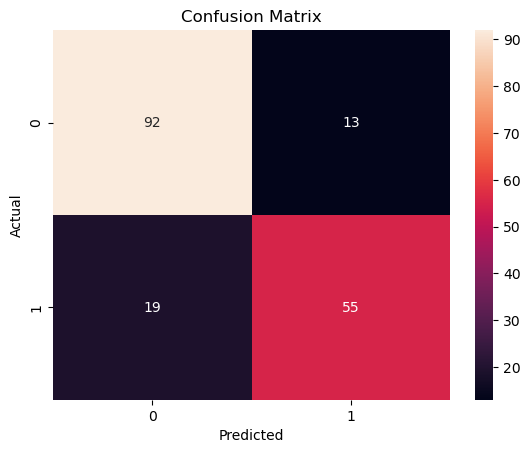

In [13]:

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 13. Classification Report

In [14]:

# Detailed performance metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## 14. Cross Validation

In [15]:

# Evaluate model stability
cv_score = cross_val_score(model, X, y, cv=5)
print("Cross Validation Accuracy:", cv_score.mean())


Cross Validation Accuracy: 0.8092461239093591


## 15. Feature Importance

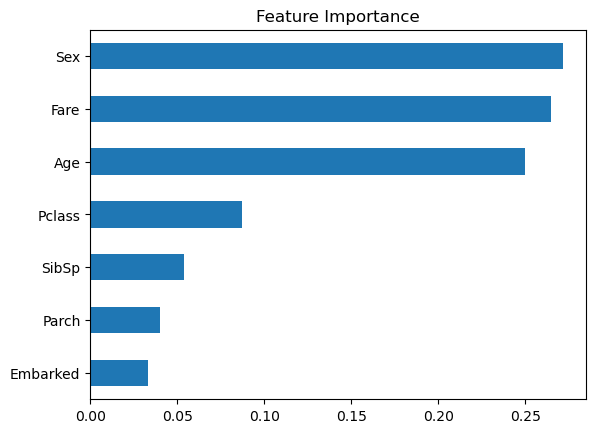

In [16]:

# Visualize most important features
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()
